In [236]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from sklearn.cluster import KMeans

In [238]:
df = pd.read_csv('D:\Data Analysis TP\CHE vs CRY 4-1.csv')

In [239]:
df = df[(df['type/displayName'] == 'Pass') & (df['outcomeType/displayName'] == 'Successful')]

In [240]:
df1 = df[['x','y','endX','endY']]

In [241]:
X = np.array(df1[['x','y','endX','endY']])

In [242]:
#K Means Clustering to find out passing clusters based on distance

kmeans = KMeans(n_clusters = 10,random_state=100)
kmeans.fit(X)
df1['cluster'] = kmeans.predict(X)

<ipython-input-242-428103fdb493>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cluster'] = kmeans.predict(X)


In [243]:
df1['cluster'].value_counts()
df1.reset_index(inplace=True)
df1.drop(['index'],axis=1,inplace=True)
df1['cluster'].value_counts()

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


7    148
2    133
8    122
6    111
9    107
4    107
1    106
0    101
3     93
5     57
Name: cluster, dtype: int64

In [244]:
df1['x'] = df1['x']*1.2
df1['endX'] = df1['endX']*1.2
df1['y'] = df1['y']*0.8
df1['endY'] = df1['endY']*0.8

<ipython-input-244-7dc0ef914b19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['x'] = df1['x']*1.2
<ipython-input-244-7dc0ef914b19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['endX'] = df1['endX']*1.2
<ipython-input-244-7dc0ef914b19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

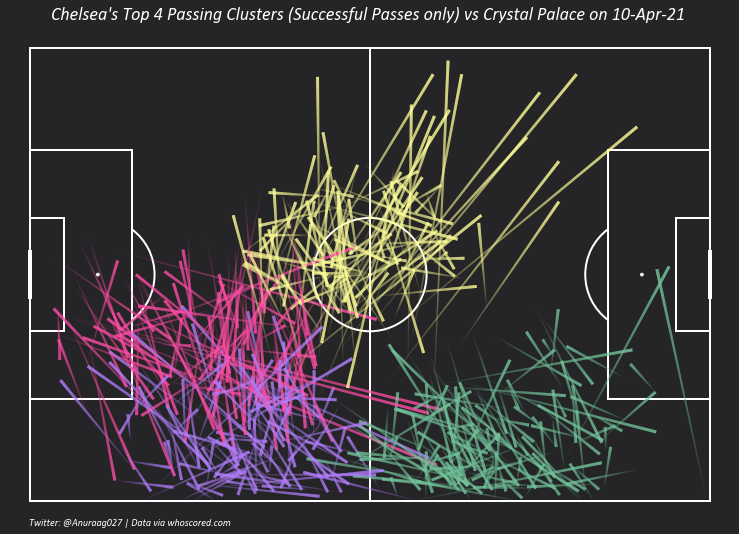

In [247]:
fig, ax = plt.subplots(figsize=(13,10))
fig.set_facecolor('#252527')
ax.patch.set_facecolor('#252527')

pitch = Pitch(pitch_type='statsbomb',orientation='horizontal',
             pitch_color='#252527',line_color='white',figsize=(13,10),
             constrained_layout=False,tight_layout=True,view='full')

pitch.draw(ax=ax)

for x in range(len(df1['cluster'])):
    if df1['cluster'][x] == 7:
        pitch.lines(xstart=df1['x'][x],ystart=df1['y'][x],xend=df1['endX'][x],yend=df1['endY'][x],
                   color='#74c69d',lw=3,zorder=2,comet=True,ax=ax,alpha_start=0.01,alpha_end=0.6,transparent=True)
        
    if df1['cluster'][x] == 2:
        pitch.lines(xstart=df1['x'][x],ystart=df1['y'][x],xend=df1['endX'][x],yend=df1['endY'][x],
                   color='#ffff99',lw=3,zorder=2,comet=True,ax=ax,alpha_start=0.01,alpha_end=0.6,transparent=True)

    if df1['cluster'][x] == 8:
        pitch.lines(xstart=df1['x'][x],ystart=df1['y'][x],xend=df1['endX'][x],yend=df1['endY'][x],
                   color='#b380ff',lw=3,zorder=2,comet=True,ax=ax,alpha_start=0.01,alpha_end=0.6,transparent=True)        
        
    if df1['cluster'][x] == 6:
        pitch.lines(xstart=df1['x'][x],ystart=df1['y'][x],xend=df1['endX'][x],yend=df1['endY'][x],
                   color='#ff4da6',lw=3,zorder=2,comet=True,ax=ax,alpha_start=0.01,alpha_end=0.6,transparent=True)
        
fig.text(.148,.155,"Twitter: @Anuraag027 | Data via whoscored.com",fontstyle='italic',fontsize=10,fontfamily='Calibri',color='white')
plt.title('Chelsea\'s Top 4 Passing Clusters (Successful Passes only) vs Crystal Palace on 10-Apr-21 ',color='white',fontfamily='Calibri',fontstyle='italic',fontsize=18)
plt.savefig('D:\Data Analysis TP\che_cry_kmeans.png',dpi=600,bbox_inches = 'tight',facecolor="#252527")

Text(0.5, 1.0, 'Mateo Kovacic Pass Map vs Crystal Palace')

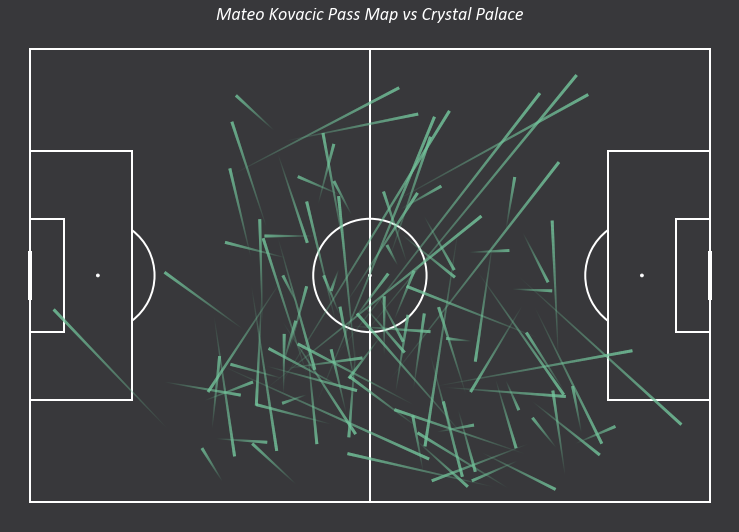

In [220]:
ko = df[df['playerId'] == 93894]
ko = ko[ko['type/displayName'] == 'Pass']
ko.reset_index(inplace=True)
ko.drop(['index'],axis=1,inplace=True)
ko = ko[['x','y','endX','endY','outcomeType/displayName']]

ko['x'] = ko['x']*1.2
ko['endX'] = ko['endX']*1.2
ko['y'] = ko['y']*0.8
ko['endY'] = ko['endY']*0.8

fig, ax = plt.subplots(figsize=(13,10))
fig.set_facecolor('#38383b')
ax.patch.set_facecolor('#38383b')

pitch = Pitch(pitch_type='statsbomb',orientation='horizontal',
             pitch_color='#38383b',line_color='white',figsize=(13,10),
             constrained_layout=False,tight_layout=True,view='full')

pitch.draw(ax=ax)

for x in range(len(ko['x'])):
    if ko['outcomeType/displayName'][x] == 'Successful':
        pitch.lines(xstart=ko['x'][x],ystart=ko['y'][x],xend=ko['endX'][x],yend=ko['endY'][x],
                   color='#74c69d',lw=3,zorder=2,comet=True,ax=ax,alpha_start=0.01,alpha_end=0.6,transparent=True)
        
plt.title('Mateo Kovacic Pass Map vs Crystal Palace',color='white',fontfamily='Calibri',fontstyle='italic',fontsize=18)